# Flashpoint Analytics

[Flashpoint](https://bluemaxima.org/flashpoint/) is a web-game preservation project, made in 2018 in an effort to save as many games as possible from the then upcoming Flash End-Of-Life, while also making them playable for everyone. Today, it hosts more than 170 000 games and thousands of active users all around the world.

This notebook contains a descriptive statistical analysis about the games available in Flashpoint, with an emphasis on categorical data, such as the technology that was used to make them or the publisher who used to host them in the past.

The Flashpoint database, which keeps all the data that will be used in the analysis, can be found [here](http://infinity.unstable.life/Flashpoint/Data/flashpoint.sqlite).

## Import modules

In [1]:
options(warn = -1)
library(RSQLite)
library(dplyr, warn.conflicts=FALSE)
library(ggplot2)
library(lubridate, warn.conflicts=FALSE)
library(tidyr)

These are the modules that we are going to use for our analysis. Notably:
* *RSQLite* allows us to communicate with a SQLite database;
* *dplyr*, *ggplot2*, *lubridate* and *tidyr* are part of the *tidyverse*, a set of very useful packages for data science.

## Retrieve data

In [2]:
dir.create("data")
url <- "http://infinity.unstable.life/Flashpoint/Data/flashpoint.sqlite"
destfile <- "data/flashpoint.sqlite"

# by default, there is a 60 seconds timeout limit when downloading a file
# this can be a problem when downloading large files, so we increase that limit
options(timeout = 300)

download.file(url, destfile)
  
con <- dbConnect(SQLite(), "data/flashpoint.sqlite")
games <- dbReadTable(con, "game")
dbDisconnect(con)

## Explore data 

Let's have a first look at our data.

In [3]:
str(games)

'data.frame':	177469 obs. of  27 variables:
 $ id                 : chr  "6db72888-6aa5-34c9-0ff3-ffe4cfe0fc61" "3bba3af6-8e76-b2c8-b423-2d2d8bdfdd50" "fb479276-2325-4dbb-bafd-64fcc8aeb684" "7cdff5f4-11cb-b1de-51bc-bca13ef78adb" ...
 $ parentGameId       : chr  "6db72888-6aa5-34c9-0ff3-ffe4cfe0fc61" "3bba3af6-8e76-b2c8-b423-2d2d8bdfdd50" "fb479276-2325-4dbb-bafd-64fcc8aeb684" "7cdff5f4-11cb-b1de-51bc-bca13ef78adb" ...
 $ title              : chr  "All Grown Up: Krazy Karts" "Showdown: The Gunfighting Game" "Hamsterball Bowling" "Dunk Tank" ...
 $ alternateTitles    : chr  "" "" "" "" ...
 $ series             : chr  "" "" "" "" ...
 $ developer          : chr  "Ezone" "3D Groove" "Ezone" "Ezone" ...
 $ publisher          : chr  "Nickelodeon" "3D Groove" "atv.Disney.go.com" "atv.Disney.go.com" ...
 $ dateAdded          : chr  "2019-06-23 04:12:17.521" "2019-06-16 23:56:03.150" "2019-06-16 23:56:02.253" "2019-06-16 23:56:01.645" ...
 $ dateModified       : chr  "2021-03-07 02:06:08" "202

There is a total of 27 variables and almost all of them belong to the *object* data type. We are going to need only some of them, so let's keep only the relevant ones.

In [4]:
games <- games %>% select(id, title, developer, publisher, platform,
                          releaseDate, language, library, tagsStr)

str(games)

'data.frame':	177469 obs. of  9 variables:
 $ id         : chr  "6db72888-6aa5-34c9-0ff3-ffe4cfe0fc61" "3bba3af6-8e76-b2c8-b423-2d2d8bdfdd50" "fb479276-2325-4dbb-bafd-64fcc8aeb684" "7cdff5f4-11cb-b1de-51bc-bca13ef78adb" ...
 $ title      : chr  "All Grown Up: Krazy Karts" "Showdown: The Gunfighting Game" "Hamsterball Bowling" "Dunk Tank" ...
 $ developer  : chr  "Ezone" "3D Groove" "Ezone" "Ezone" ...
 $ publisher  : chr  "Nickelodeon" "3D Groove" "atv.Disney.go.com" "atv.Disney.go.com" ...
 $ platform   : chr  "3D Groove GX" "3D Groove GX" "3D Groove GX" "3D Groove GX" ...
 $ releaseDate: chr  "" "" "" "" ...
 $ language   : chr  "" "" "" "" ...
 $ library    : chr  "arcade" "arcade" "arcade" "arcade" ...
 $ tagsStr    : chr  "Racing" "Shooter" "Arcade" "Arcade" ...


To complete our preliminary analysis, let's print the first rows of our dataframe.

In [5]:
head(games)

,id,title,developer,publisher,platform,releaseDate,language,library,tagsStr
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,6db72888-6aa5-34c9-0ff3-ffe4cfe0fc61,All Grown Up: Krazy Karts,Ezone,Nickelodeon,3D Groove GX,,,arcade,Racing
2,3bba3af6-8e76-b2c8-b423-2d2d8bdfdd50,Showdown: The Gunfighting Game,3D Groove,3D Groove,3D Groove GX,,,arcade,Shooter
3,fb479276-2325-4dbb-bafd-64fcc8aeb684,Hamsterball Bowling,Ezone,atv.Disney.go.com,3D Groove GX,,,arcade,Arcade
4,7cdff5f4-11cb-b1de-51bc-bca13ef78adb,Dunk Tank,Ezone,atv.Disney.go.com,3D Groove GX,,,arcade,Arcade
5,1d9ff021-2404-9785-bb7d-0fceda67a55d,Baby Knight,Pepworks,Pepworks,3D Groove GX,,,arcade,Platformer
6,65caa1b2-6702-4aad-8108-790be1ef86e2,Yin Yang Yo: The Dangerous Comic Book of Dread,Ezone,a.media.global.go.com,3D Groove GX,,en,arcade,Platformer; Yin Yang Yo!


## Analyze data 

### Developers and Publishers

It would be interesting to know which are the most prolific developers and publishers. Let's find out by creating a frequency table for each variable and looking at the first ten entries.

In [6]:
top_developers <- games %>% count(developer) %>% arrange(desc(n)) %>% head(10)
top_developers

,developer,n
,<chr>,<int>
1,,46151
2,123Bee,2730
3,Games2Rule,2441
4,Games2Jolly.com,1915
5,Selfdefiant,1603
6,WowEscape.com,1436
7,Top10NewGames,1144
8,PalmarianFire,1059
9,Ena Game Studio,1031


The first row is blank because some games (actually, most of them) do not have a developer value associated in the database. Let's filter out those entries.

In [7]:
top_developers <- games %>% filter(developer != "") %>% count(developer) %>%
  arrange(desc(n)) %>% head(10)
top_developers

,developer,n
,<chr>,<int>
1,123Bee,2730
2,Games2Rule,2441
3,Games2Jolly.com,1915
4,Selfdefiant,1603
5,WowEscape.com,1436
6,Top10NewGames,1144
7,PalmarianFire,1059
8,Ena Game Studio,1031
9,Neopets,957


These are the most represented developers in the database. It is impressive to notice that almost all of them are known to be specialised in escape games, which we can suppose to be a very popular genre; we will dig into this later. Lastly, a special mention for Neopets, which managed to build a passionate community still active after over 20 years.

In [8]:
top_publishers <- games %>% filter(publisher != "") %>% count(publisher) %>%
  arrange(desc(n)) %>% head(10)
top_publishers

,publisher,n
,<chr>,<int>
1,DeviantArt,7655
2,Newgrounds,6550
3,Disney,2428
4,Nickelodeon,1659
5,Armor Games,1437
6,GameMonetize,1374
7,Eka's Portal,1261
8,Cartoon Network,1243
9,Kongregate,1219


Among the publishers, we can see some very renowned names, at least in the gaming community, like *Newgrounds*, *Armor Games* and *Kongregate*. There is also a considerable amount of games published by TV broadcasters, such as *Disney*, *Nickelodeon* and *Cartoon Network*, supposedly to promote their shows.

Now let's look at a visualization of the same data, by making use of bar plots and pie charts.

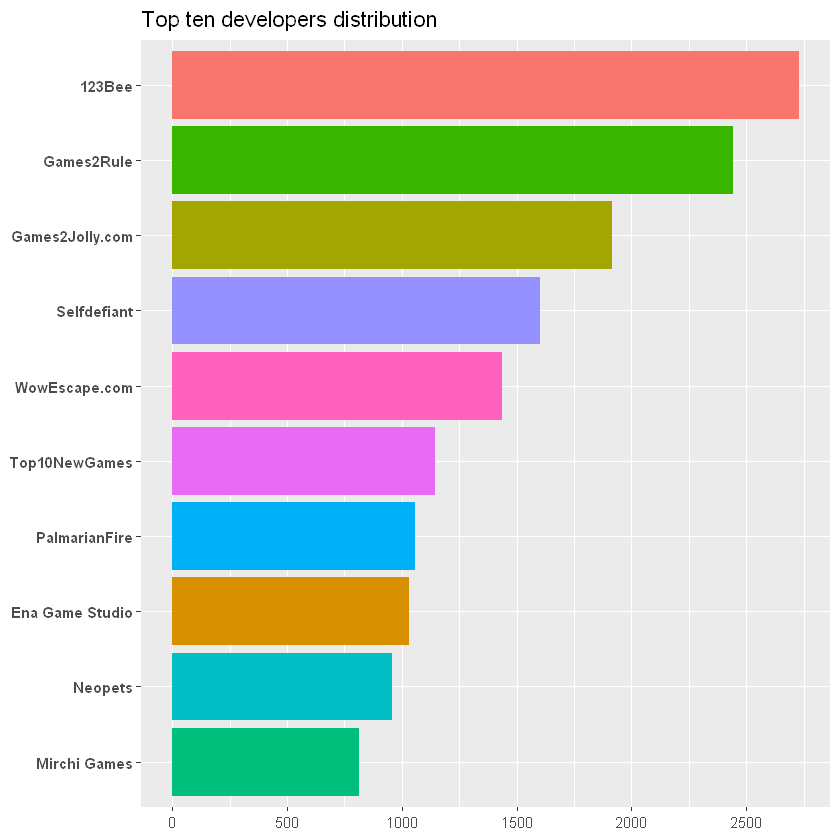

In [9]:
top_developers %>% as.data.frame() %>%
  ggplot(aes(x = reorder(developer, n), y = n, fill = developer)) +
  geom_bar(stat = "identity") + coord_flip() +
  scale_y_continuous(breaks = seq(0, 2500, by = 500)) +
  ggtitle("Top ten developers distribution") +
  theme(legend.position = "none", axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_text(face = "bold"))

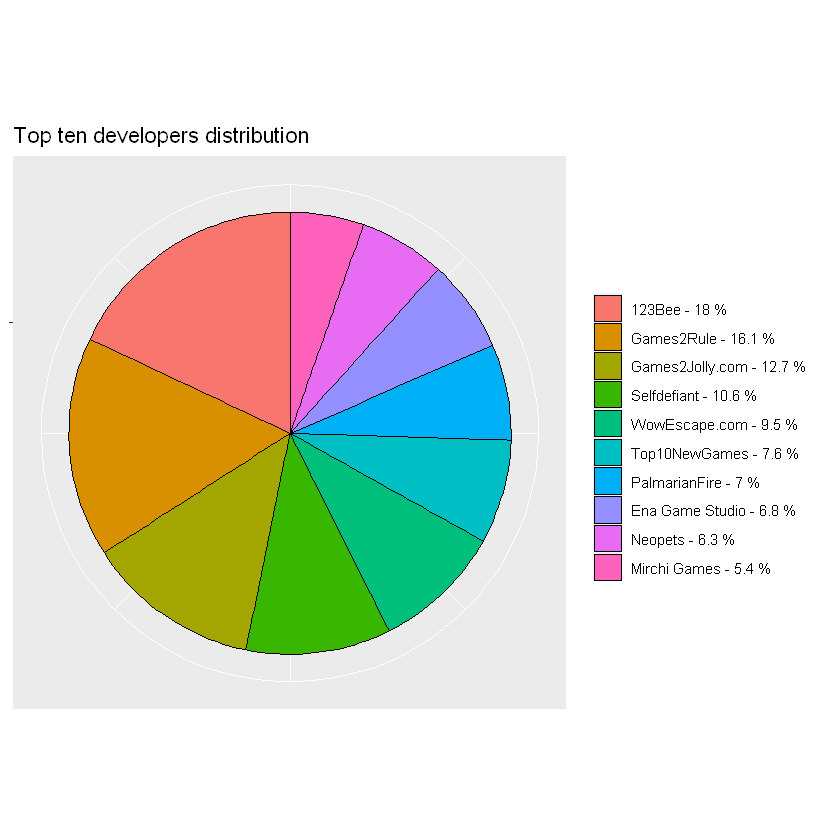

In [10]:
sizes <- round(top_developers$n / sum(top_developers$n) * 100, 1)
labels <- vector()

for(i in 1:(length(sizes))){
  labels[i] <- paste(top_developers$developer[i], "-", toString(sizes[i]), "%")
}
  
top_developers %>% as.data.frame() %>%
  ggplot(aes(x = "", y = sizes, fill = reorder(developer, -n))) +
  geom_bar(stat = "identity", width = 1, color = "black") +
  coord_polar(theta = "y", start = 0) +
  theme(axis.text = element_blank(), axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        legend.title = element_blank()) +
  scale_fill_discrete(labels = labels) +
  ggtitle("Top ten developers distribution")

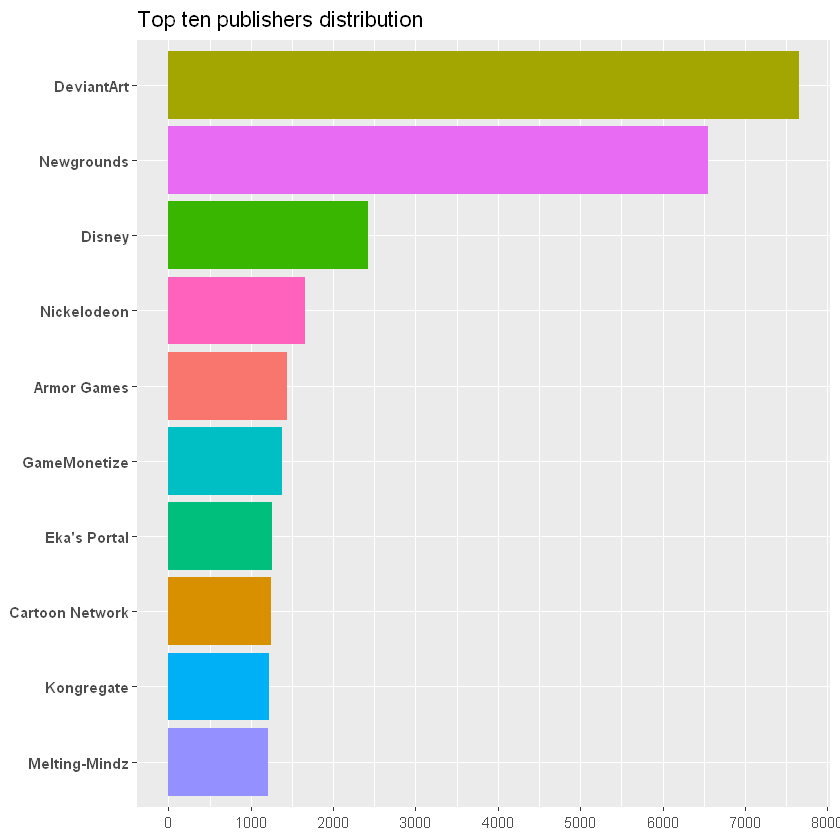

In [11]:
top_publishers %>% as.data.frame() %>%
  ggplot(aes(x = reorder(publisher, n), y = n, fill = publisher)) +
  geom_bar(stat = "identity") + coord_flip() +
  scale_y_continuous(breaks = seq(0, 8000, by = 1000)) +
  ggtitle("Top ten publishers distribution") +
  theme(legend.position = "none", axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_text(face = "bold"))

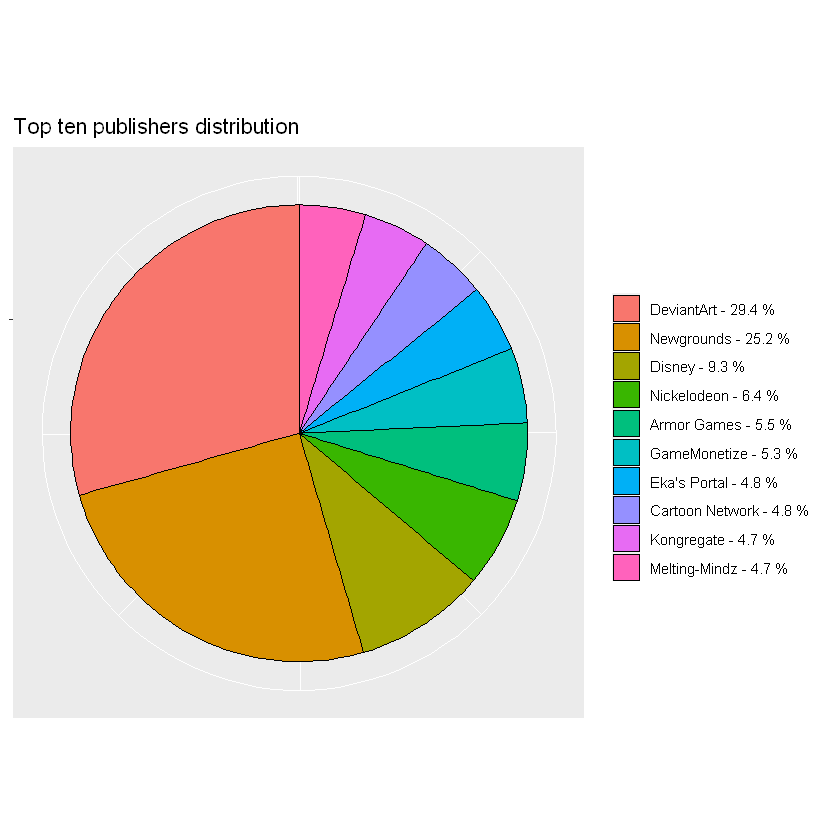

In [12]:
sizes <- round(top_publishers$n / sum(top_publishers$n) * 100, 1)
labels <- vector()

for(i in 1:(length(sizes))){
  labels[i] <- paste(top_publishers$publisher[i], "-", toString(sizes[i]), "%")
}

top_publishers %>% as.data.frame() %>%
  ggplot(aes(x = "", y = sizes, fill = reorder(publisher, -n))) +
  geom_bar(stat = "identity", width = 1, color = "black") +
  coord_polar(theta = "y", start = 0) +
  theme(axis.text = element_blank(), axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        legend.title = element_blank()) +
  scale_fill_discrete(labels = labels) +
  ggtitle("Top ten publishers distribution")

### Release Dates and Platforms

Flash games started to appear towards the end of the twentieth century and became popular in the next decade. Let's observe the release dates we have got here, being aware that they are not specified for all games.

In [13]:
dates <- games %>% filter(releaseDate != "") %>%
  select(title, releaseDate, platform, library) %>%
  arrange(releaseDate)
head(dates)
tail(dates)

,title,releaseDate,platform,library
,<chr>,<chr>,<chr>,<chr>
1,TankTrouble,16-12-2007,Flash,arcade
2,Blastar,1984,HTML5,arcade
3,Idle Johnny,1993,Shockwave,theatre
4,QP-Shot 1000,1994,Shockwave,arcade
5,The Health Checkup,1994,Shockwave,theatre
6,ZZZ...I want to sleep,1994,Shockwave,theatre


,title,releaseDate,platform,library
,<chr>,<chr>,<chr>,<chr>
75992,"T-Mobile Tuesdays: Win $2,300 for 2023!",2022-12-27,HTML5,arcade
75993,GWL Hayley Footjob (Commission),2080-10-05,Flash,arcade
75994,Havok Xtra Marble Demo,21/08/2001,Shockwave,arcade
75995,Ray Cast Car,27/06/2001,Shockwave,arcade
75996,(Gift) Luna's Christmas gift,2917-12-26,Flash,theatre
75997,Havok Xtra RC Car Demo,7/1/2002,Shockwave,arcade


There seems to be a problem with the data. Entries should follow the "YY-MM-DD" date format as per Flashpoint guidelines, but some games come in a different one. In addition, if the exact day or month of release is unknown, it is allowed to specify the year only. Let's clean up our data for consistency.

In [14]:
dates$releaseDate <- dates$releaseDate %>% ymd(truncated = 2)
dates <- dates %>% na.omit() %>% arrange(releaseDate)
head(dates)
tail(dates)

,title,releaseDate,platform,library
,<chr>,<date>,<chr>,<chr>
1,Blastar,1984-01-01,HTML5,arcade
2,Idle Johnny,1993-01-01,Shockwave,theatre
3,QP-Shot 1000,1994-01-01,Shockwave,arcade
4,The Health Checkup,1994-01-01,Shockwave,theatre
5,ZZZ...I want to sleep,1994-01-01,Shockwave,theatre
6,Dangerous Two,1994-01-01,Shockwave,theatre


,title,releaseDate,platform,library
,<chr>,<date>,<chr>,<chr>
75982,Awesome Game,2022-12-23,HTML5,arcade
75983,Christmas in Vienna,2022-12-23,HTML5,arcade
75984,Chrysler Building,2022-12-23,HTML5,arcade
75985,"T-Mobile Tuesdays: Win $2,300 for 2023!",2022-12-27,HTML5,arcade
75986,GWL Hayley Footjob (Commission),2080-10-05,Flash,arcade
75987,(Gift) Luna's Christmas gift,2917-12-26,Flash,theatre


*ymd* automatically assigned January 1 as month and day for those games whose only date information was the year.
There are still a couple of odd observations, the last two, which are most likely typos.

In [15]:
dates <- dates %>% slice(1:(nrow(dates)-2))
head(dates, 20)

,title,releaseDate,platform,library
,<chr>,<date>,<chr>,<chr>
1,Blastar,1984-01-01,HTML5,arcade
2,Idle Johnny,1993-01-01,Shockwave,theatre
3,QP-Shot 1000,1994-01-01,Shockwave,arcade
4,The Health Checkup,1994-01-01,Shockwave,theatre
5,ZZZ...I want to sleep,1994-01-01,Shockwave,theatre
6,Dangerous Two,1994-01-01,Shockwave,theatre
7,Virtual Banana Original,1994-02-01,VRML,arcade
8,Virtual University of Auckland,1994-02-01,Hyper-G,arcade
9,Clock,1994-11-17,Hyper-G,arcade


Finally, we have got our correct release dates. We see that the oldest game in the list is *Blastar*, which was released in 1984. Actually, the game present in Flashpoint is a HTML5 version, which was developed and released much more recently. Moving on, starting from 1993 we recognize some old technologies, such as *Shochwave*, *VRML* and *Hyper-G*.

We can actually distinguish between proper games and animations by looking at the *library* column: the former are labeled with *arcade*, the latter with *theatre* values. Thus, the oldest animation featured is *Idle Johnny* from 1993, while the first "true" game (not counting *Blastar*) could be either *QP-Shot 1000* (which came out at some time in 1994), or *Virtual Banana Original* and *Virtual University of Auckland*, both from February 1st, 1994.

In [16]:
dates <- dates %>% slice(2:nrow(dates))
tail(dates, 20)

,title,releaseDate,platform,library
,<chr>,<date>,<chr>,<chr>
75965,Um Conto da Cloe,2022-12-08,HTML5,arcade
75966,Pad of Time,2022-12-08,HTML5,arcade
75967,/f/ 101,2022-12-09,Flash,arcade
75968,Vault of the Pineapples,2022-12-09,HTML5,arcade
75969,Snowsgiving Choose Your Own Adventure,2022-12-10,HTML5,arcade
75970,look_into_my_eyes_its_open_wide.swf,2022-12-10,Flash,theatre
75971,The Smurfs Cooking,2022-12-13,HTML5,arcade
75972,Mcdonalds Final,2022-12-13,HTML5,arcade
75973,In the Name of Freedom: Black Apocalypse,2022-12-13,HTML5,arcade


On the other side, here are the 20 most recent games. As expected, we find out that nowadays *HTML5* is the standard technology to make flash games, though some exceptions arise and there is even a *Flash* entry!

For the sake of completeness, let's restrict our search to *Flash*-only games.

In [17]:
dates %>% filter(platform == "Flash") %>% head(20)

,title,releaseDate,platform,library
,<chr>,<date>,<chr>,<chr>
1,Claus.com,1995-01-01,Flash,arcade
2,2 Design's Navigational Demo,1996-01-01,Flash,arcade
3,CHAOS Website,1996-01-01,Flash,arcade
4,"FutureWave Software, Inc. Website",1996-01-01,Flash,arcade
5,Good Music Company Website,1996-01-01,Flash,arcade
6,The Silicon Slip,1996-01-01,Flash,arcade
7,Zygomedia Website,1996-01-01,Flash,arcade
8,First MouseOver Button,1996-01-01,Flash,arcade
9,"Simple, Tasty Buttons",1996-01-01,Flash,arcade


The first *Flash* game is *Claus.com* from 1995. We notice that most of these are actually websites built in *Flash* and not exactly games or animations.

To take an overall view, let's compare the various platforms by games count, considering the top five.

In [18]:
top_platforms <- dates %>% count(platform) %>% arrange(desc(n)) %>% head(5)
top_platforms

,platform,n
,<chr>,<int>
1,Flash,59047
2,HTML5,10904
3,Shockwave,1996
4,Unity,875
5,Java,751


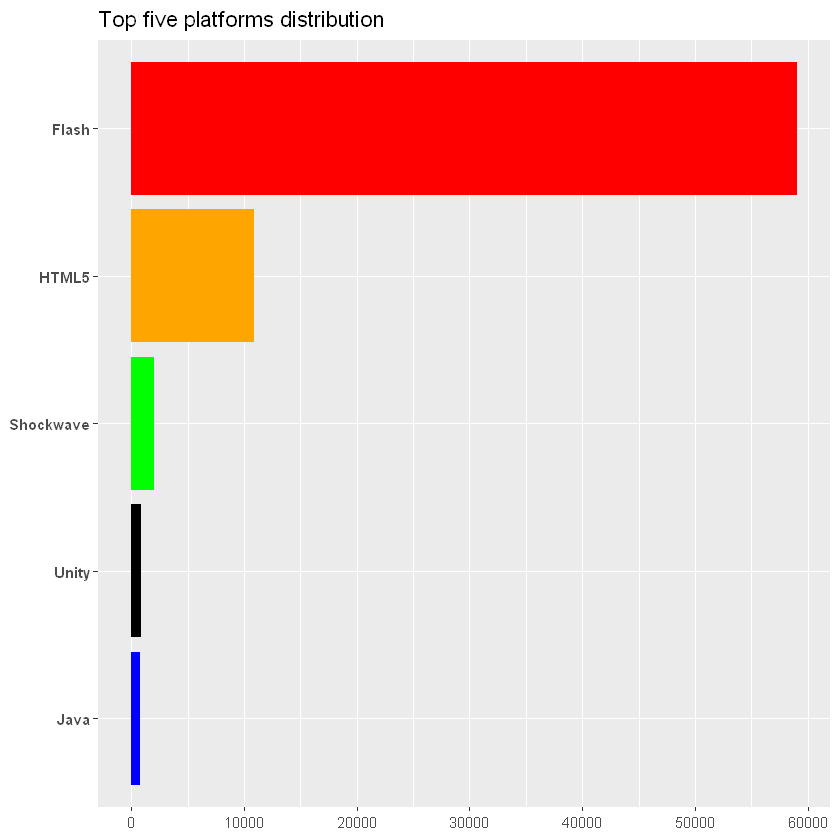

In [19]:
colors <- c("red", "orange", "blue", "green", "black")

top_platforms %>% as.data.frame() %>% arrange(platform) %>%
  ggplot(aes(x = reorder(platform, n), y = n, fill = platform)) +
  geom_bar(stat = "identity") + coord_flip() +
  scale_y_continuous(breaks = seq(0, 60000, by = 10000)) +
  ggtitle("Top five platforms distribution") +
  theme(legend.position = "none", axis.title.x = element_blank(),
        axis.title.y = element_blank(), axis.text.y = element_text(face = "bold")) +
  scale_fill_manual(values = colors)

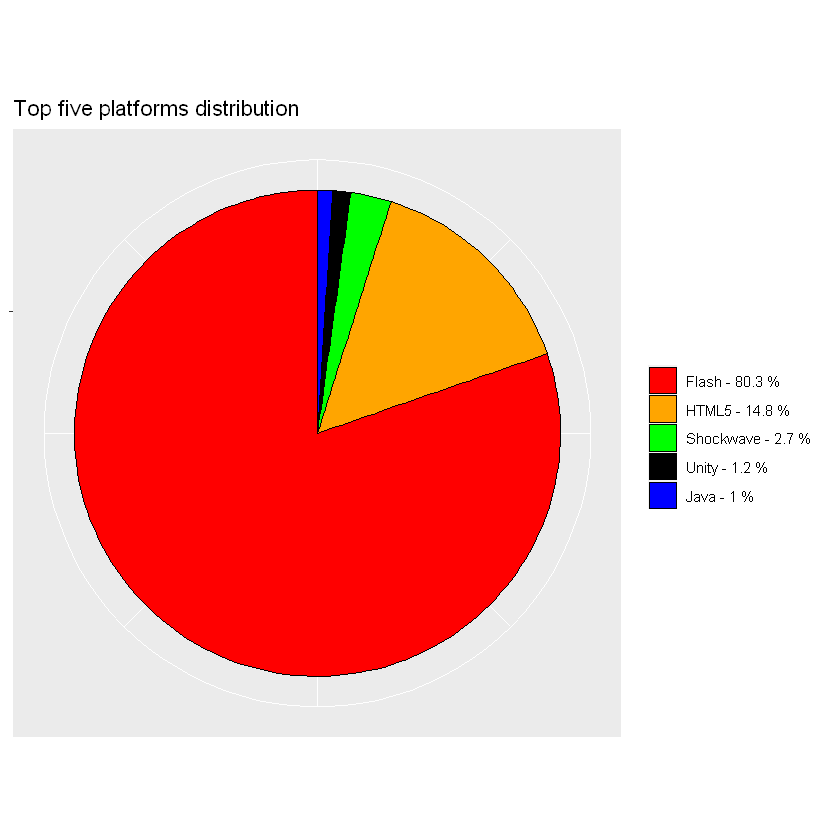

In [20]:
sizes <- round(top_platforms$n / sum(top_platforms$n) * 100, 1)
labels <- vector()

for(i in 1:(length(sizes))){
  labels[i] <- paste(top_platforms$platform[i], "-", toString(sizes[i]), "%")
}

colors <- c("red", "orange", "green", "black", "blue")

top_platforms %>% as.data.frame() %>%
  ggplot(aes(x = "", y = sizes, fill = reorder(platform, -n))) +
  geom_bar(stat = "identity", width = 1, color = "black") +
  coord_polar(theta = "y", start = 0) +
  theme(axis.text = element_blank(), axis.title.x = element_blank(),
        axis.title.y = element_blank(), legend.title = element_blank()) +
  scale_fill_manual(labels = labels, values = colors) +
  ggtitle("Top five platforms distribution")

*Flash* is clearly the winner, followed by a rising *HTML5* and its old companion *Shockwave*, with *Unity* and *Java* as outsiders.

Web games were at their peak in the 2000s and many gamers are nostalgic about that decade, which could be considered a golden age. Thus, we expect to see that most of the games in our database have been released between 2000 and 2009. Let's check it out, while also comparing technologies against years.

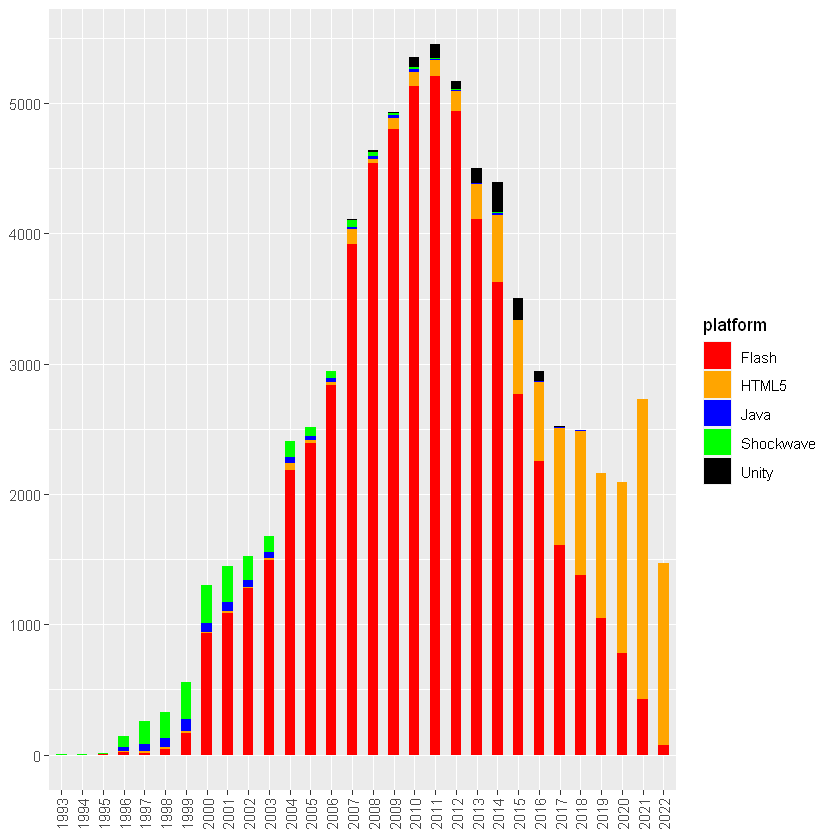

In [21]:
year_platform <- dates %>% filter(platform %in% top_platforms$platform)
years <- year_platform$releaseDate %>% sapply(substr, start = 1, stop = 4)
year_platform$releaseDate <- years

colors <- c("red", "orange", "blue", "green", "black")

year_platform %>% count(releaseDate, platform) %>%
  ggplot(aes(x = releaseDate, y = n, fill = platform, width = 0.5)) +
  geom_bar(position = position_stack(reverse = TRUE), stat = "identity") +
  scale_y_continuous(breaks = seq(0, 6000, by = 1000)) +
  theme(axis.title.x = element_blank(),
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
        axis.title.y = element_blank()) +
  scale_fill_manual(values = colors)

*Et voila*! As we were expecting, web games have steadily risen in popularity in the first decade of the third millennium, reached a peak in 2011 and today their number is slowly decreasing, apart from some fluctuations. This does not mean that fewer games are being made: it could simply be that there is less incentive to curate and preserve a recent game written in a technology which will probably stay on for a long time compared to an old game with a nostalgic value that runs the risk to disappear at any time.

*Flash* dominated the scene between 2000 and 2017 (it's impressive to see that it lasted so long), while *HTML5* started to be relevant around 2013. *Shockwave* was most popular between 1996 and 2000, but continued to be used until 2007. *Unity* had six years of relative notoriety (2010-2016) and lastly, Java, despite being one of the first technologies eligible for making web games, has never known much use and moved off the radar around 2010.

## Most common languages

Let's move on to another topic: *Flashpoint* allows non-English content as well, and it can be interesting to know which countries have contributed the most to the world of web games aside from the anglophone ones.

In [22]:
top_languages <- games %>% filter(language != "") %>% { . ->> tmp } %>%
  select(language) %>%
  vapply(gsub, pattern = ",", replacement = ";", character(nrow(tmp))) %>%
  as.data.frame() %>%
  separate_rows(language, sep = "; ") %>% count(language) %>%
  arrange(desc(n)) %>%
  filter(language != "en") %>% head(10)
top_languages

language,n
<chr>,<int>
ja,7709
pt,3350
es,3095
ko,2525
fr,2519
de,2298
pl,2183
ru,2015
zh,2011


Since a game can come in different languages, separated by a colon and a space ("; "), we had to count each occurrence individually.

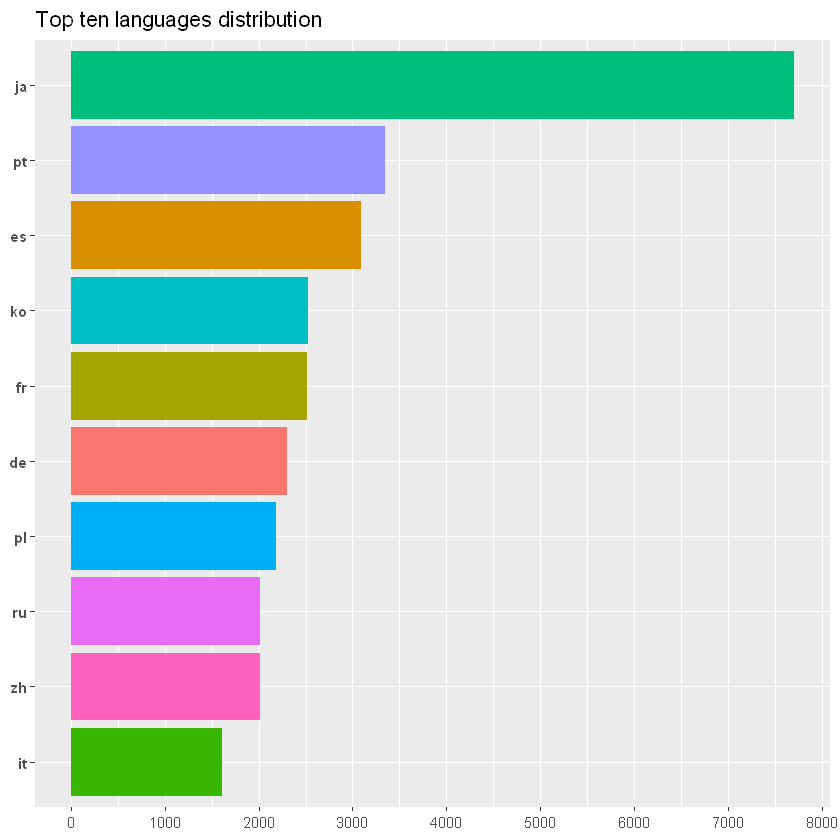

In [23]:
top_languages %>% as.data.frame() %>% arrange(language) %>%
  ggplot(aes(x = reorder(language, n), y = n, fill = language)) +
  geom_bar(stat = "identity") + coord_flip() +
  scale_y_continuous(breaks = seq(0, 8000, by = 1000)) +
  ggtitle("Top ten languages distribution") +
  theme(legend.position = "none", axis.title.x = element_blank(),
        axis.title.y = element_blank(), axis.text.y = element_text(face = "bold"))

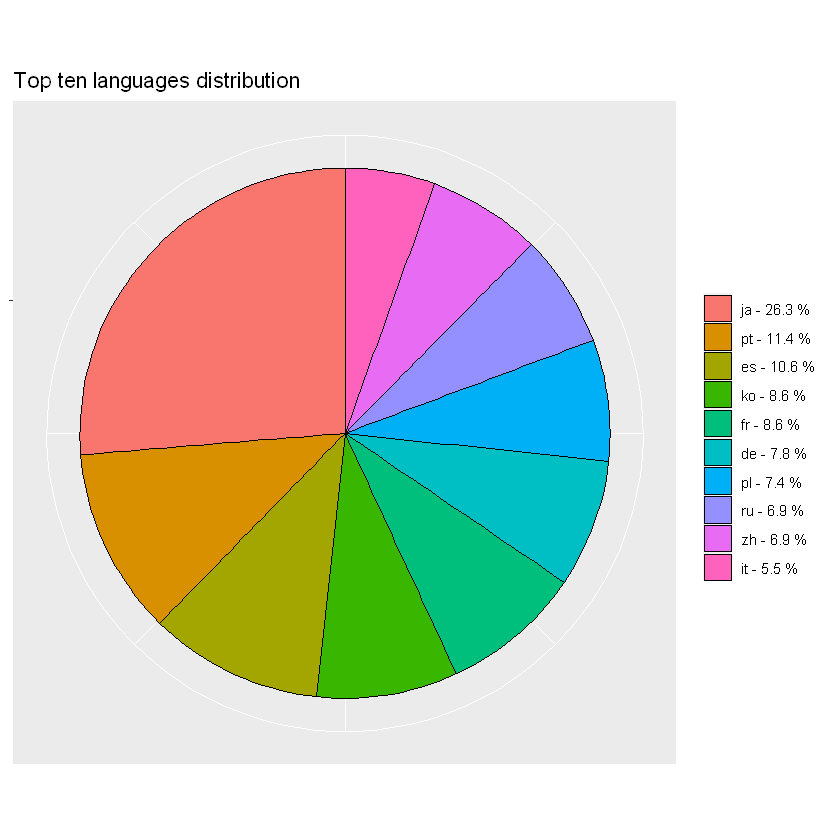

In [24]:
sizes <- round(top_languages$n / sum(top_languages$n) * 100, 1)
labels <- vector()

for(i in 1:(length(sizes))){
  labels[i] <- paste(top_languages$language[i], "-", toString(sizes[i]), "%")
}

top_languages %>% as.data.frame() %>%
  ggplot(aes(x = "", y = sizes, fill = reorder(language, -n))) +
  geom_bar(stat = "identity", width = 1, color = "black") +
  coord_polar(theta = "y", start = 0) +
  theme(axis.text = element_blank(), axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        legend.title = element_blank()) +
  scale_fill_discrete(labels = labels) +
  ggtitle("Top ten languages distribution")

We can see a strong presence of Asian content, with Japanese, Korean and Chinese among the top ten languages. The rest of the list is completed by European countries, namely Portugal, Spain, France, Germany, Poland and Italy, as well as Russia.

## Most popular genres

Let's now focus on game genres, featured on the *tagsStr* column, to discover the most common ones.

In [25]:
top_genres <- games %>% filter(tagsStr != "") %>% { . ->> tmp } %>%
  select(tagsStr) %>%
  vapply(gsub, pattern = ",", replacement = ";", character(nrow(tmp))) %>%
  as.data.frame() %>%
  separate_rows(tagsStr, sep = "; ") %>% count(tagsStr) %>%
  arrange(desc(n)) %>% head(10)
top_genres

tagsStr,n
<chr>,<int>
Arcade,27308
Puzzle,25284
Adventure,24981
Escape the Room,17725
Dress Up,12101
Simulation,11993
Action,10452
Score-Attack,9703
Loop,7599


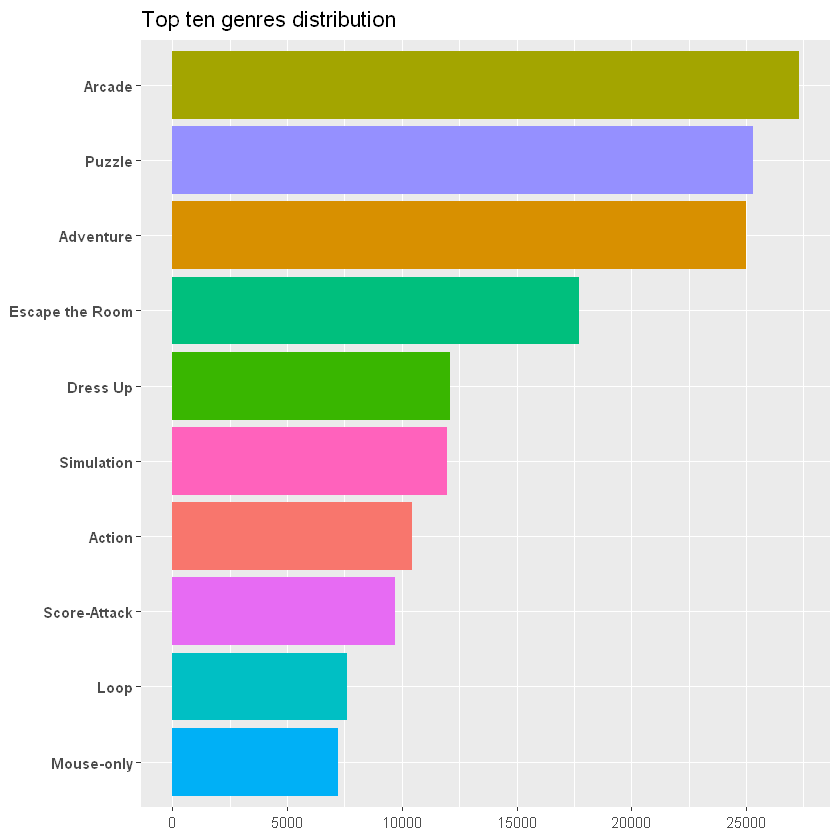

In [26]:
top_genres %>% as.data.frame() %>%
  ggplot(aes(x = reorder(tagsStr, n), y = n, fill = tagsStr)) +
  geom_bar(stat = "identity") + coord_flip() +
  scale_y_continuous(breaks = seq(0, 30000, by = 5000)) +
  ggtitle("Top ten genres distribution") +
  theme(legend.position = "none", axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_text(face = "bold"))

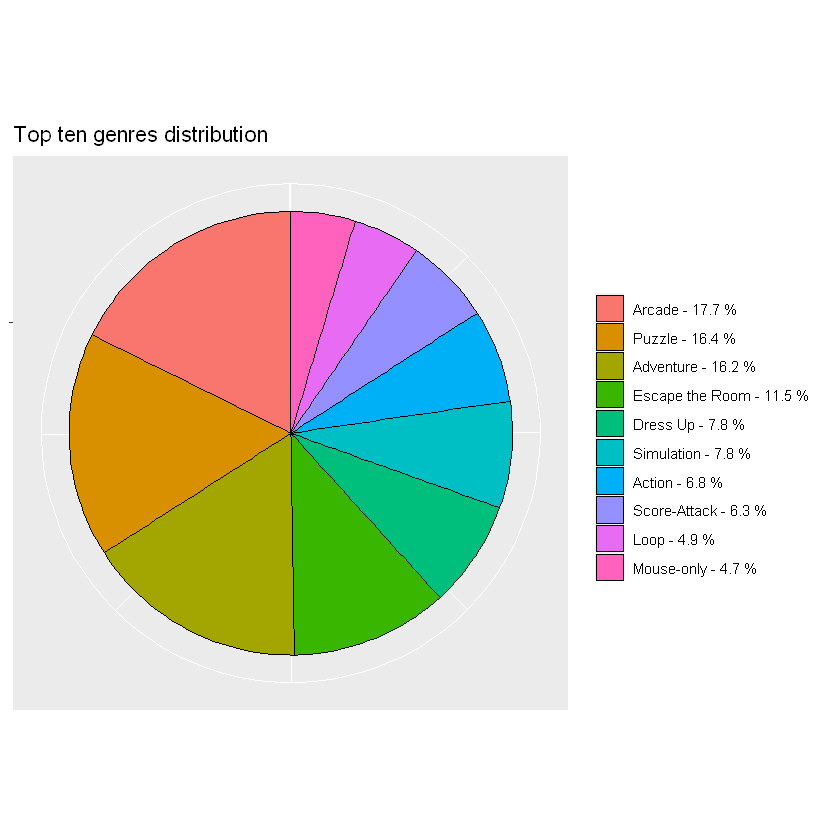

In [27]:
sizes <- round(top_genres$n / sum(top_genres$n) * 100, 1)
labels <- vector()

for(i in 1:(length(sizes))){
  labels[i] <- paste(top_genres$tagsStr[i], "-", toString(sizes[i]), "%")
}

top_genres %>% as.data.frame() %>%
  ggplot(aes(x = "", y = sizes, fill = reorder(tagsStr, -n))) +
  geom_bar(stat = "identity", width = 1, color = "black") +
  coord_polar(theta = "y", start = 0) +
  theme(axis.text = element_blank(), axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        legend.title = element_blank()) +
  scale_fill_discrete(labels = labels) +
  ggtitle("Top ten genres distribution")

The big three genres are *Arcade*, *Puzzle* and *Adventure* and honestly it's kind of odd to see *Action* at such a low position. Conversely, as we expected from our previous analysis on developers, *Escape the Room* is fairly popular, along with *Dress Up* and *Simulation* games.

## Most played games

As a final insight, let's find out which are the most played games among the *Flashpoint* users: to do this, we are going to use some official statistics from the platform itself. Visit https://flashpoint-analytics.unstable.life/, scroll down to the corresponding section and download the data in .csv format.

In [28]:
most_played <- read.csv("data/most_played.csv") %>% rename(id = category)
most_played

id,Play.Count
<chr>,<int>
83e1b5e7-4282-4bbd-868e-dcfa965e4abf,48493
a94d865c-cb38-4d31-96f3-dda26502c4a3,10228
617ca7f3-1cff-3f0c-5b53-07498b3b28d8,7454
8d09fc0d-6f25-4be6-b396-8fcaddad4e5e,7253
b0ce771e-7c02-4317-8528-ba48139e2688,6922
fdee4800-b5c9-49e0-b19e-22f2b0ccab68,6919
1e903a30-5c37-15bb-8e5e-6fea5a8103f2,6678
07921a2f-26fd-4364-9671-ee0c8d256ec1,6423
b9a8dbb9-0cd7-434b-b226-13dc9dd07b49,6341


The file contains the *id* for the most 40 played games, along with a play count. Let's use the identifiers to find the titles of these games and their other info.

In [29]:
rank <- inner_join(games, most_played, by = join_by(id)) %>% arrange(desc(Play.Count))
rank

id,title,developer,publisher,platform,releaseDate,language,library,tagsStr,Play.Count
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
83e1b5e7-4282-4bbd-868e-dcfa965e4abf,Poptropica,Sandbox Networks Inc.; Pearson Education,,Flash,2007-09,en,arcade,Educational; Platformer; Puzzle; Variety; Side-Scrolling,48493
a94d865c-cb38-4d31-96f3-dda26502c4a3,Jacksmith,Flipline Studios,PapaLouie.com,Flash,2012-09-27,en,arcade,Simulation; Time Management,10228
617ca7f3-1cff-3f0c-5b53-07498b3b28d8,Papa's Cheeseria,Flipline Studios,PapaLouie.com,Flash,2015-06-10,en,arcade,Cooking; Simulation; Time Management; Achievements,7454
8d09fc0d-6f25-4be6-b396-8fcaddad4e5e,Strike Force Heroes 3,Sky9 Games,Armor Games,Flash,,en,arcade,Action; Shooter,7253
b0ce771e-7c02-4317-8528-ba48139e2688,Super Mario Bros. Crossover,Exploding Rabbit,,Flash,2010-04-27,en,arcade,Arcade; Platformer; Score-Attack; Pixel; Side-Scrolling; Castlevania; Contra; Final Fantasy; Kid Icarus; Kunio-kun; Mega Man; Metroid; Super Mario; The Legend of Zelda,6922
fdee4800-b5c9-49e0-b19e-22f2b0ccab68,Strike Force Heroes,Sky9 Games,Armor Games,Flash,2012-05-31,en,arcade,Shooter; Action,6919
1e903a30-5c37-15bb-8e5e-6fea5a8103f2,Papa's Scooperia,Flipline Studios,PapaLouie.com,Flash,2018-07-24,en,arcade,Cooking; Simulation; Time Management; Achievements,6678
07921a2f-26fd-4364-9671-ee0c8d256ec1,Bloons TD 5,Ninja Kiwi,Ninja Kiwi,Flash,2011-12-13,en,arcade,Tower Defense; Strategy,6423
b9a8dbb9-0cd7-434b-b226-13dc9dd07b49,Papa's Sushiria,Flipline Studios,PapaLouie.com,Flash,2016-12-13,en,arcade,Cooking; Simulation; Time Management; Achievements,6341


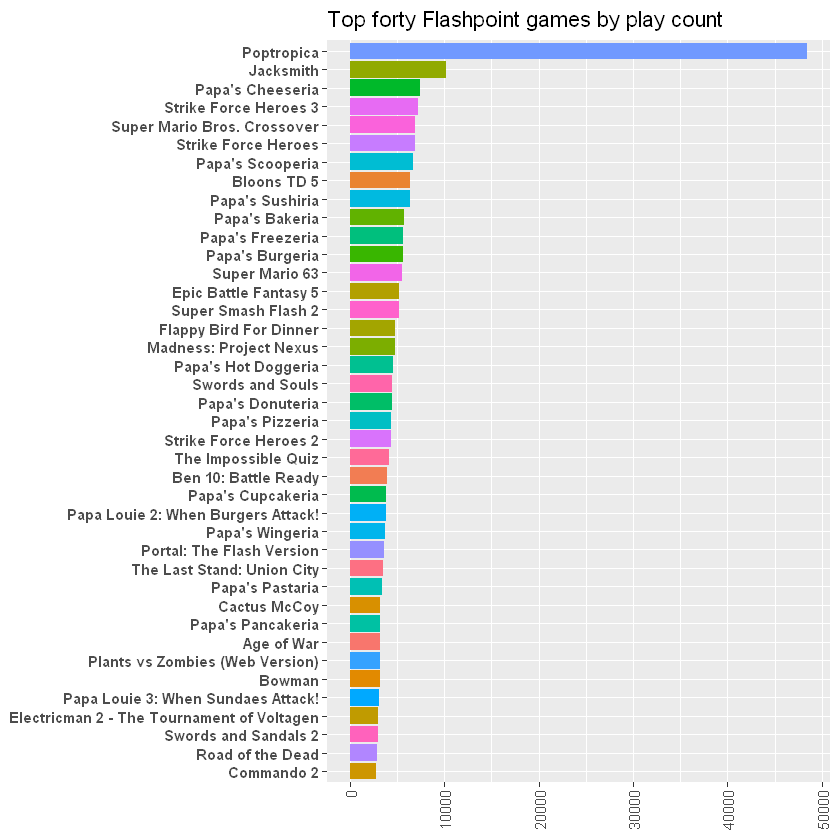

In [30]:
rank %>% ggplot(aes(x = reorder(title, Play.Count), y = Play.Count, fill = title)) +
  geom_bar(stat = "identity") + coord_flip() +
  scale_y_continuous(breaks = seq(0, 50000, by = 10000)) +
  ggtitle("Top forty Flashpoint games by play count") +
  theme(legend.position = "none", axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
        axis.text.y = element_text(face = "bold"))

There we go! *Poptropica* is the indisputable winner, with almost fifty thousand play counts. There is a massive presence of *Papa's Gameria* franchise, as well as all-time classics like *Strike Force Heroes*, *Super Mario 63* and *Age of War*. Finally, a special remark about *Ben 10: Battle Ready*, which was thought to be lost forever, before it was restored and made playable again on *Flashpoint*.

## Conclusion

This was a thorough analysis of the *Flashpoint* catalogue, which hopefully gives some insights about the world of web-based games and their significant relevance in the history of the Internet.

The effort to preserve this kind of content has generated amazing results, saving an astounding quantity of material which would have disappeared otherwise. Despite the concrete risk of a digital dark age, we should insist on preserving the stuff that we care about and keep it alive, not only for historical reasons, but also for the nostalgic value we associate with it.